<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_likes = pd.read_csv('likes.csv')

In [3]:
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [4]:
df_likes.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2.104000e+03,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,1.591984e+06,33.427281,13.144962,1979.572719,5.882605,274.701046,2.039924,1.453422,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,3.444627e+05,16.155287,9.242513,16.155287,3.698839,297.508563,1.397070,1.242272,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,1.000738e+06,13.000000,1.000000,1905.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.295331e+06,22.000000,4.750000,1971.750000,2.000000,54.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.584463e+06,28.000000,12.500000,1985.000000,6.000000,191.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.883310e+06,41.250000,21.000000,1991.000000,9.000000,387.000000,3.000000,2.000000,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000
max,2.193411e+06,108.000000,31.000000,2000.000000,12.000000,2303.000000,5.000000,5.000000,5937.000000,1326.000000,5704.000000,679.000000,1580.000000,647.000000


In [5]:
df_likes = df_likes.drop('userid',axis = 1)

# Dropping user id since it may no contribute in modelling du to its nature 

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

In [6]:
#to know the no.of columns and rows
df_likes.shape

(2104, 14)

In [7]:
#To know the data types 
df_likes.dtypes

age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                    int64
friend_count              int64
friendships_initiated     int64
likes                     int64
likes_received            int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

In [7]:
df_likes.isna().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [8]:
df_likes['gender'] = df_likes['gender'].fillna(df_likes['gender'].mode()[0])

<AxesSubplot:xlabel='age', ylabel='Density'>

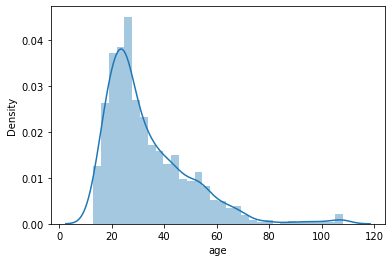

In [9]:
#Checking the Distribution of the age across dataset
sns.distplot(df_likes['age'])

In [11]:
#by Looking at the plot we can say that the data is right skewed

<AxesSubplot:xlabel='age'>

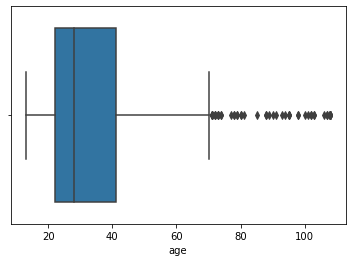

In [10]:
sns.boxplot(df_likes['age'])

In [13]:
# Outliers are present in the data 
# They can be treated by using IQR treatment

<AxesSubplot:xlabel='gender', ylabel='count'>

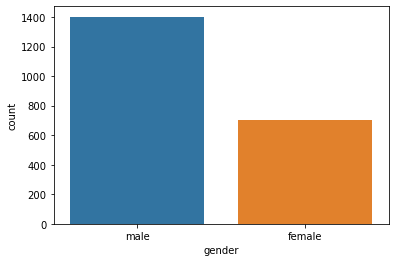

In [11]:
# Variable Gender Visualisation

sns.countplot(df_likes['gender'])

# There are almost double the female count in the male 

<AxesSubplot:xlabel='tenure', ylabel='Density'>

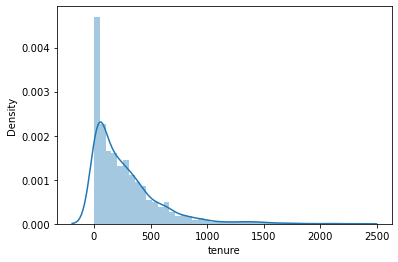

In [12]:
#Checking the Distribution of the tenure across dataset
sns.distplot(df_likes['tenure'])

In [16]:
#by Looking at the plot we can say that the data is right skewed

<AxesSubplot:xlabel='tenure'>

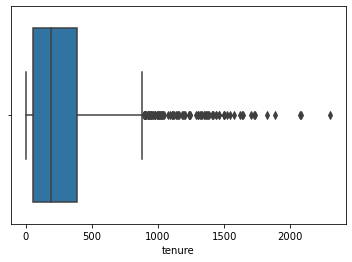

In [13]:
sns.boxplot(df_likes['tenure'])

In [18]:
# Outlier influence is present in the tenure dataset

<AxesSubplot:xlabel='likes'>

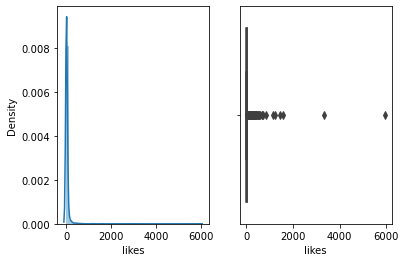

In [14]:
plt.subplot(1,2,1)
sns.distplot(df_likes['likes'])
plt.subplot(1,2,2)
sns.boxplot(df_likes['likes'])

The data is more concentrated at a single number 

In [20]:
df_likes['likes'].var()

28714.730289112802

<AxesSubplot:xlabel='mobile_likes'>

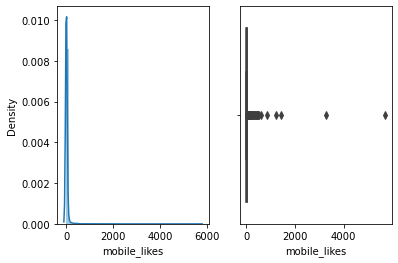

In [15]:
plt.subplot(1,2,1)
sns.distplot(df_likes['mobile_likes'])
plt.subplot(1,2,2)
sns.boxplot(df_likes['mobile_likes'])

The data is more concentrated at a single number 

In [22]:
df_likes_num = df_likes.select_dtypes(include = np.number)

<AxesSubplot:>

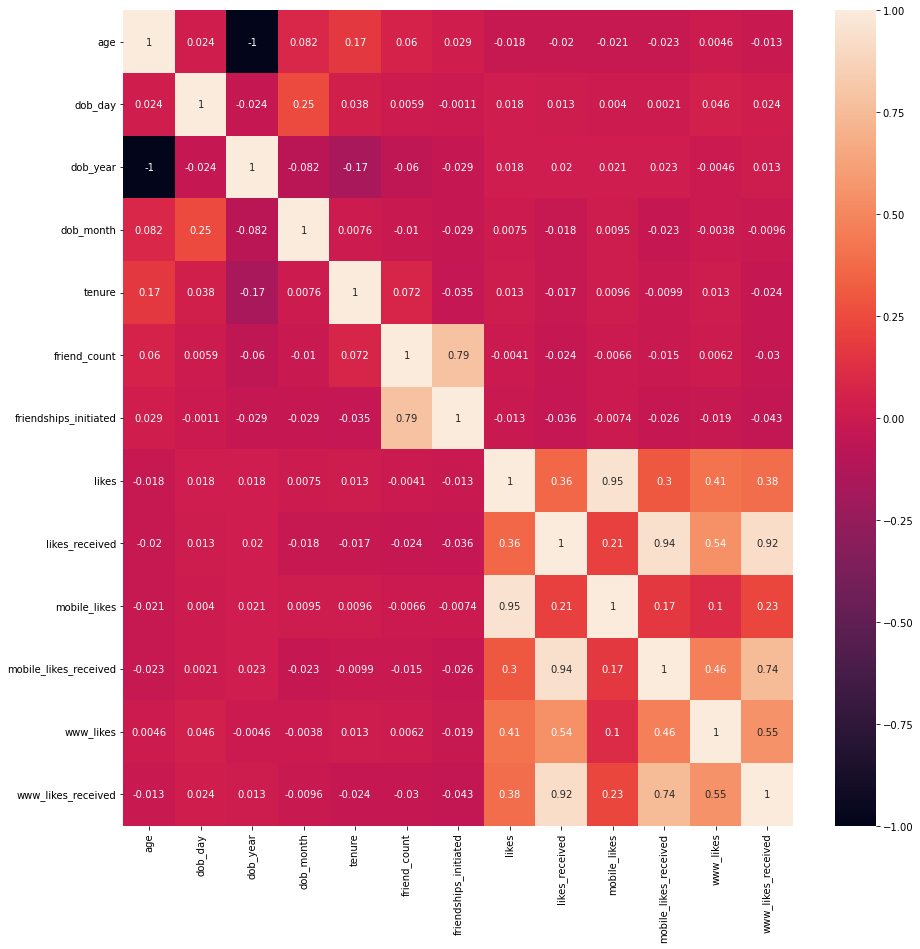

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df_likes_num.corr(),annot = True)

In [24]:
# From the Heat Map we can say that age and Year are higly correlated so we can eliminate any one

#dob and age are highly correlated

# friend count and friend initiated are highly correlated 

# likes received and www_likes_received are highly correlated

# The more the Independent Variables are correlated It Increases the Multi Collinearity between Variables and prediction of the
# y variable and the effect of significance of one variable decreases


In [25]:
df_likes_drop = df_likes.drop('dob_year',axis = 1)

In [26]:
df_likes_drop = df_likes.drop('likes_received',axis =1)

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [27]:
X = df_likes_drop.drop('likes',axis =1)
y = df_likes_drop['likes']

In [28]:
df_likes_drop = df_likes_drop.replace({'male':0,'female':1})

In [29]:
df_likes_drop.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,0,0,0,0,1,0,0,1,0
1,14,22,1999,1,0,104,0,0,1,0,0,1,0
2,19,18,1994,10,1,212,0,0,1,0,0,1,0
3,21,1,1992,1,0,328,0,0,1,0,0,1,0
4,23,10,1990,2,0,580,0,0,1,0,0,1,0


In [30]:
df_likes_drop['gender'] = df_likes_drop['gender'].astype(np.number)

In [31]:
df_likes_drop.dtypes

age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                   float64
tenure                     int64
friend_count               int64
friendships_initiated      int64
likes                      int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [32]:
df_likes_drop = df_likes_drop.drop('dob_year',axis = 1)

In [33]:
# Scaling the Features

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
scaler = StandardScaler()

In [35]:
X = df_likes_drop.drop('likes',axis = 1)
y = df_likes_drop['likes']

In [152]:
X

,age,dob_day,dob_month,gender,tenure,friend_count,friendships_initiated,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2,0.0,0,0,0,0,0,1,0
1,14,22,1,0.0,104,0,0,0,0,1,0
2,19,18,10,1.0,212,0,0,0,0,1,0
3,21,1,1,0.0,328,0,0,0,0,1,0
4,23,10,2,0.0,580,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2099,19,13,3,0.0,304,5,2,1,2,0,0
2100,19,21,4,0.0,12,5,1,1,4,0,0
2101,20,4,4,0.0,128,5,5,1,3,0,0
2102,25,19,1,0.0,52,5,5,1,1,0,8


In [36]:
scaler.fit(X)

X_sc = scaler.transform(X)

In [37]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_sc,y,random_state=3,test_size=0.3)

In [147]:
Xtrain

array([[-0.1502826 ,  0.30897621, -0.23867338, ..., -0.15843973,
        -0.18569604, -0.1737465 ],
       [-0.52176634, -1.31434477, -1.32035091, ..., -0.15843973,
        -0.18569604, -0.1737465 ],
       [-1.14090592,  0.30897621, -0.23867338, ..., -0.15843973,
        -0.18569604, -0.1737465 ],
       ...,
       [ 0.5926849 , -0.01568799,  1.11342353, ...,  0.46118331,
         1.07980383,  1.67960678],
       [-0.52176634,  0.525419  ,  0.30216538, ..., -0.15843973,
         2.06614932, -0.1737465 ],
       [ 0.53077094, -0.34035218, -0.50909276, ...,  0.30627755,
        -0.18569604, -0.03813528]])

In [38]:
Xtrain_scaled = pd.DataFrame(Xtrain,columns = X.columns)

In [39]:
Xtest_scaled = pd.DataFrame(Xtest,columns = X.columns)

# Scaling has been done by using the standard scaler

In [40]:
from warnings import filterwarnings

filterwarnings('ignore')

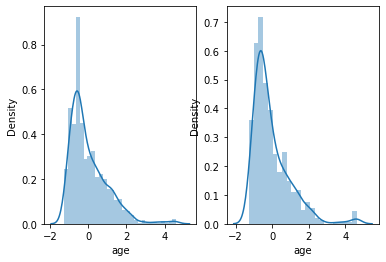

In [41]:
#Comparing Train data and test data

plt.subplot(1,2,1)
sns.distplot(Xtrain_scaled['age'])
plt.subplot(1,2,2)
sns.distplot(Xtest_scaled['age'])
plt.show()


# The data Looks almost Same which can be told that train and test are exactly Similar but not in Quantity

In [42]:
Xtrain_scaled.describe()

,age,dob_day,dob_month,gender,tenure,friend_count,friendships_initiated,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,0.021158,0.004530,0.007313,-0.023244,-0.025140,0.011786,0.012342,-0.027712,0.017802,-0.002817,0.011982
std,0.990878,0.993588,0.998487,0.991830,0.982870,0.992055,1.002538,0.406354,1.163588,1.066557,1.125783
min,-1.264734,-1.314345,-1.320351,-0.707611,-0.923558,-1.460491,-1.170249,-0.113885,-0.158440,-0.185696,-0.173746
25%,-0.645594,-0.881459,-1.049932,-0.707611,-0.742848,-0.744537,-1.170249,-0.113885,-0.158440,-0.185696,-0.173746
50%,-0.274111,-0.015688,0.031746,-0.707611,-0.299898,-0.028584,-0.365081,-0.107442,-0.158440,-0.185696,-0.173746
75%,0.530771,0.741862,0.843004,1.413206,0.331326,0.687370,0.440087,-0.075228,-0.080987,-0.129865,-0.128543
max,4.617092,1.932297,1.654262,1.413206,6.819236,2.119278,2.855590,9.073510,26.136813,29.218566,29.073072


In [43]:
Xtest_scaled.describe()

,age,dob_day,dob_month,gender,tenure,friend_count,friendships_initiated,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,-0.049281,-0.010551,-0.017032,0.054138,0.058554,-0.027451,-0.028745,0.064546,-0.041464,0.006561,-0.027907
std,1.020799,1.016272,1.004889,1.018287,1.038000,1.019308,0.995056,1.715659,0.419049,0.826114,0.615400
min,-1.264734,-1.314345,-1.320351,-0.707611,-0.923558,-1.460491,-1.170249,-0.113885,-0.158440,-0.185696,-0.173746
25%,-0.769422,-0.989681,-1.049932,-0.707611,-0.736124,-0.744537,-0.365081,-0.113885,-0.158440,-0.185696,-0.173746
50%,-0.397938,-0.123909,-0.238673,-0.707611,-0.241062,-0.028584,-0.365081,-0.107442,-0.158440,-0.185696,-0.173746
75%,0.360508,0.850083,0.843004,1.413206,0.469170,0.687370,0.440087,-0.081671,-0.080987,-0.129865,-0.128543
max,4.617092,1.932297,1.654262,1.413206,6.062776,2.119278,2.855590,36.635694,4.566186,13.288156,8.776594


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [45]:
model_lr = lr.fit(Xtrain_scaled,ytrain)

In [46]:
model_lr.coef_

array([ 3.41916578e-15, -2.47014296e-14,  1.26214616e-14, -5.44008595e-14,
       -8.44687867e-15,  5.12333741e-15, -8.18396371e-15,  1.55212663e+02,
        6.59357282e-13,  5.37337074e+01, -7.95275736e-13])

In [47]:
y_pred = model_lr.predict(Xtest_scaled)

In [48]:
residuals = np.array(ytest-y_pred)
variation = np.sum(residuals**2)
variation

8.347891128750119e-23

<AxesSubplot:>

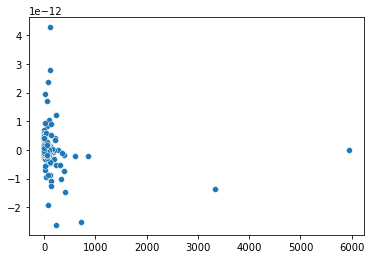

In [49]:
sns.scatterplot(y_pred,residuals)

In [50]:
# Building the Model with Best Features
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [51]:
model_lr_best = sfs(estimator = lr,k_features='best',verbose=2,scoring='r2')



In [52]:
model_lr_best = model_lr_best.fit(Xtrain_scaled,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-11-20 22:38:26] Features: 1/11 -- score: 0.6383653189027344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-20 22:38:26] Features: 2/11 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-20 22:38:26] Features: 3/11 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

In [53]:
model_lr_5 = sfs(estimator = lr,k_features=5,verbose=2,scoring='r2')
model_lr_5 = model_lr_5.fit(Xtrain_scaled,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-11-20 22:38:27] Features: 1/5 -- score: 0.6383653189027344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-20 22:38:27] Features: 2/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-20 22:38:27] Features: 3/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s 

In [54]:
model_lr_5.k_feature_names_

('age', 'dob_day', 'dob_month', 'mobile_likes', 'www_likes')

In [55]:
Xtrain_feat = Xtrain_scaled[['age','dob_day','dob_month','mobile_likes','www_likes']]
Xtest_feat = Xtest_scaled[['age','dob_day','dob_month','mobile_likes','www_likes']]

In [56]:
Xtrain_feat.shape

(1472, 5)

In [57]:
ytest.shape

(632,)

In [58]:
model_lr_5f = lr.fit(Xtrain_feat,ytrain)


In [59]:
import statsmodels.api as sm 


In [87]:
Xtrain_feat = Xtrain_feat.reset_index(drop = True)
Xtest_feat = Xtest_feat.reset_index(drop = True)

In [62]:
ytrain = ytrain.reset_index(drop = True)

In [88]:
Xtrain_feat_c = sm.add_constant(Xtrain_feat)

model_ols = sm.OLS(ytrain,Xtrain_feat_c).fit()
model_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.828e+32
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:12:24   Log-Likelihood:                 42131.
No. Observations:                1472   AIC:                        -8.425e+04
Df Residuals:                    1466   BIC:                        -8.422e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.6545   2.35e-15   1.18e+16      0.000      27.654      27.654
age          -3.508e-14   2.38e-15    -14.767      0.000   -3.97e-14   -3.04e-14
dob_day        8.66e-15   2.43e-15      3.557      0.000    3.88e-15    1.34e-14
dob_month     1.754e-14   2.43e-15      7.234      0.000    1.28e-14    2.23e-14
mobile_likes   155.2127    5.8e-15   2.68e+16      0.000     155.213     155.213
www_likes       53.7337   2.21e-15   2.43e+16      0.000      53.734      53.734
==============================================================================
Omnibus:                     1502.510   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1304121.149
Skew:                           3.892   Prob(JB):                         0.00
Kurtosis:                     148.610   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
y_pred_ols = model_ols.predict(sm.add_constant(Xtest_feat))

In [92]:
residual = np.array(y_pred_ols-ytest)

In [104]:
residual  = np.array(y_pred_ols.reset_index(drop = True) - ytest.reset_index(drop = True))

In [95]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


In [99]:
mse = mean_squared_error(ytest,y_pred_ols)
mse
rmse_test = np.sqrt(mse)
rmse_test
#MSE is found to be very low

2.556639741020939e-13

In [ ]:
#r2 is found to be very high which indicated the model may over fit

In [100]:
y_pred_train = model_ols.predict(Xtrain_feat_c)

mse_train = mean_squared_error(y_pred_train,ytrain)

rmse_train = np.sqrt(mse_train)
rmse_train

8.987911440574923e-14

In [ ]:
# There is a large Differnece between Train and Test RMSE 

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

<AxesSubplot:ylabel='likes'>

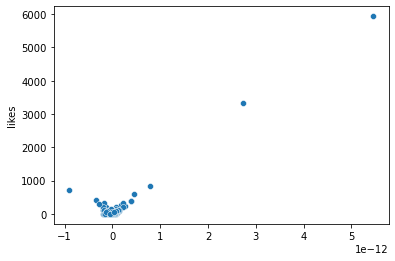

In [105]:
sns.scatterplot(residual,ytest)

# The Residual Plot says that the Residuals are Homoscedastic

In [108]:
print(residual.var())
residual.mean()

6.535745178146384e-26


2.5721337858483453e-15

<AxesSubplot:ylabel='Density'>

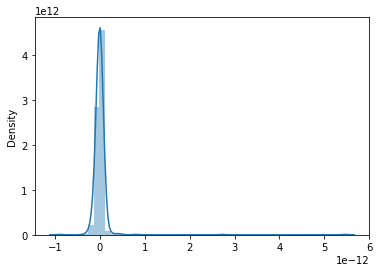

In [109]:
sns.distplot(residual)

In [ ]:
# The Residuals are not normally Distributed after the Model Building

In [110]:
df_likes.describe()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,33.427281,13.144962,1979.572719,5.882605,274.701046,2.039924,1.453422,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,16.155287,9.242513,16.155287,3.698839,297.508563,1.397070,1.242272,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,13.000000,1.000000,1905.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,4.750000,1971.750000,2.000000,54.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,12.500000,1985.000000,6.000000,191.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,41.250000,21.000000,1991.000000,9.000000,387.000000,3.000000,2.000000,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000
max,108.000000,31.000000,2000.000000,12.000000,2303.000000,5.000000,5.000000,5937.000000,1326.000000,5704.000000,679.000000,1580.000000,647.000000


<AxesSubplot:xlabel='likes'>

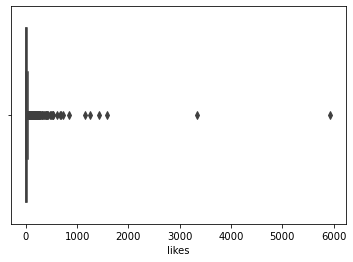

In [111]:
sns.boxplot(df_likes['likes'])

# Outliers and Extreme Values are present in the likes colmn

<AxesSubplot:xlabel='mobile_likes'>

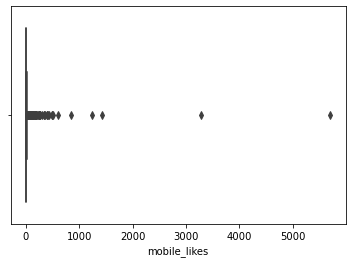

In [113]:
sns.boxplot(df_likes['mobile_likes'])

# Outliers and Extreme Values are present in the mobile likes colmn

<AxesSubplot:xlabel='tenure'>

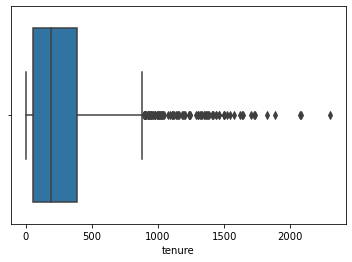

In [115]:
sns.boxplot(df_likes['tenure'])

# Outliers are present in the tenure colmn

<AxesSubplot:xlabel='www_likes'>

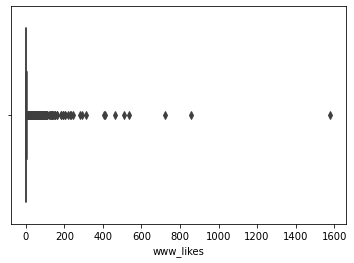

In [116]:
sns.boxplot(df_likes['www_likes'])

# Outliers and Extreme Values are present in the likes colmn

<AxesSubplot:xlabel='likes_received'>

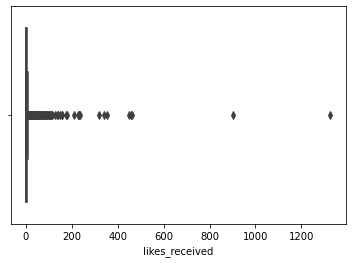

In [117]:
sns.boxplot(df_likes['likes_received'])

# Outliers and Extreme Values are present in the likes colmn

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [118]:
from sklearn.feature_selection import RFE

In [134]:
rfe = RFE(estimator = lr,n_features_to_select=5)
rfe_model = rfe.fit(Xtrain,ytrain)


In [153]:
features  = pd.Series(rfe_model.ranking_,index = X.columns)

In [155]:
features[features == 1]

age                      1
friend_count             1
mobile_likes             1
mobile_likes_received    1
www_likes                1
dtype: int32

In [156]:
# By this we can say the best 5 predictors are as above

In [157]:
rfe_model.score

<bound method RFE.score of RFE(estimator=LinearRegression(), n_features_to_select=5)>

In [160]:
X_rfe = X[['age','friend_count','mobile_likes','mobile_likes_received','www_likes']]
y_rfe = y

In [161]:
X_rfetrain,X_rfetest,yrfetrain,yrfetest = train_test_split(X_rfe,y_rfe,random_state=23,test_size=0.2)

In [163]:
model_ols_rfe = sm.OLS(yrfetrain,sm.add_constant(X_rfetrain)).fit()
model_ols_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.548e+33
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:01:43   Log-Likelihood:                 48276.
No. Observations:                1683   AIC:                        -9.654e+04
Df Residuals:                    1677   BIC:                        -9.651e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -5.24e-14   5.41e-15     -9.686      0.000    -6.3e-14   -4.18e-14
age                    4.857e-16   1.23e-16      3.938      0.000    2.44e-16    7.28e-16
friend_count           1.066e-14   1.47e-15      7.243      0.000    7.77e-15    1.35e-14
mobile_likes              1.0000   1.23e-17   8.14e+16      0.000       1.000       1.000
mobile_likes_received  8.327e-17   1.03e-16      0.809      0.419   -1.19e-16    2.85e-16
www_likes                 1.0000   6.01e-17   1.66e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     4057.456   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36814031.133
Skew:                         -23.846   Prob(JB):                         0.00
Kurtosis:                     725.982   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
y_pred_rfe_ols = model_ols_rfe.predict(sm.add_constant(X_rfetest))

In [166]:
y_pred_rfe_ols_train  = model_ols_rfe.predict(sm.add_constant(X_rfetrain)) 

In [168]:
rmse_train = np.sqrt(mean_squared_error(y_pred_rfe_ols,yrfetest))
rmse_test = np.sqrt(mean_squared_error(y_pred_rfe_ols_train,yrfetrain))

In [169]:
rmse_test,rmse_train

(8.437776056617018e-14, 6.120047571150815e-14)

In [170]:
# SInce Rmse values almost same we can tell model is perect fit

In [ ]:
#K- Score Cross validation

In [172]:
from sklearn.model_selection import cross_val_score


In [173]:

scores = cross_val_score(   estimator = lr, 
                            X = X_rfetrain, 
                            y = yrfetrain, 
                            cv = 5, 
                            scoring = 'r2',
                         )

In [174]:
scores

array([1., 1., 1., 1., 1.])